# Сжатие изображения методом SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline
plt.rcParams['figure.dpi'] = 120

## Загрузка и подготовка изображения

In [2]:
image_path = '12345678.jpg'  # путь к изображению
image = Image.open(image_path)

gray_image_pil = image.convert('L')
gray_image = np.asarray(gray_image_pil, dtype=np.float32) / 255.0

m, n = gray_image.shape
print(f'Размер изображения: {m} x {n}')

Размер изображения: 360 x 540


## SVD-разложение

In [3]:
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

print('U:', U.shape)
print('S:', S.shape)
print('Vt:', Vt.shape)

U: (360, 360)
S: (360,)
Vt: (360, 540)


## Сжатие изображения

In [12]:
k = min(50, min(m, n))
print(f'Используем k = {k}')

S_k = np.diag(S[:k])

Используем k = 50


## Восстановление изображения

In [13]:
approx_image = U[:, :k] @ S_k @ Vt[:k, :]

## Оценка сжатия

In [14]:
original_elements = m * n
compressed_elements = m * k + k + k * n
compression_factor = original_elements / compressed_elements

print(f'Исходное хранение: {original_elements} элементов')
print(f'SVD-хранение: {compressed_elements} элементов')
print(f'Коэффициент сжатия: {compression_factor:.2f}x')

Исходное хранение: 194400 элементов
SVD-хранение: 45050 элементов
Коэффициент сжатия: 4.32x


## Визуализация

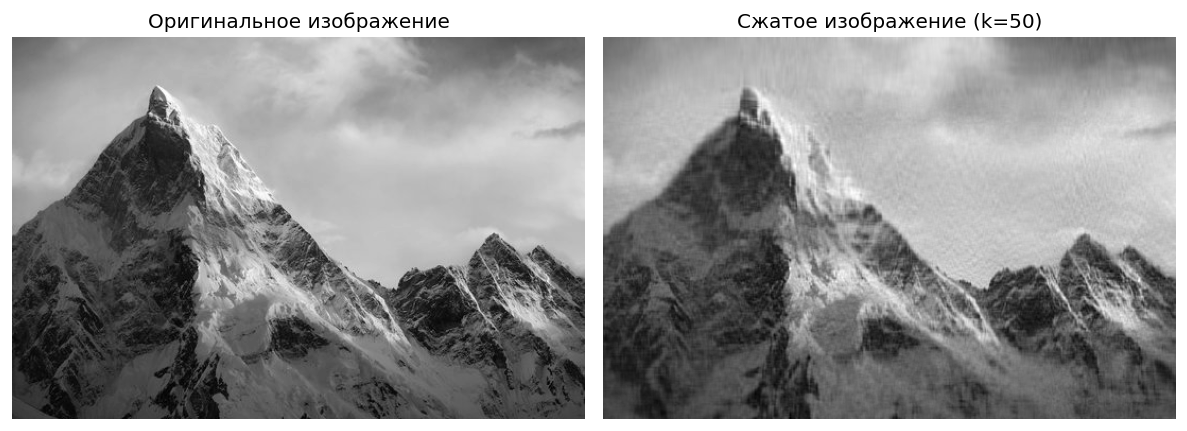

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Оригинальное изображение')
axes[0].axis('off')

axes[1].imshow(approx_image, cmap='gray')
axes[1].set_title(f'Сжатое изображение (k={k})')
axes[1].axis('off')

plt.tight_layout()
plt.show()